<a href="https://colab.research.google.com/github/maliiha/CSE221/blob/main/21201434_MalihaBinteMasud_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CSE330 Section 15 Special Assignment Summer 2024** (Total Marks : 10)

In [ ]:
Name = "Maliha Binte Masud"
ID = "21201434"
Section = "15"

# Question 01 [6 Marks]

Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{2.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq(2.1), \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{2.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

e. Derive 2 more separate $g(x)$ from the given $f(x)$

f. Apply Fixed Point Method on the rest of the $g(x)$s and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found

In [ ]:
import numpy as np

def f(x):
    return x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + x/2 + 2

roots = np.roots([1, 2.5, -2, -6, 0.5, 2])
print("Actual roots:", roots)


Actual roots: [-2.22027583  1.37526761 -1.61803399  0.61803399 -0.65499178]


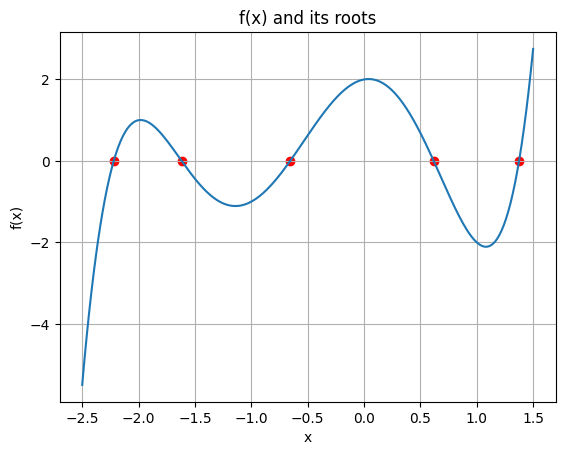

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-2.5, 1.5, 400)
y = f(x)

plt.plot(x, y)
plt.scatter(np.real(roots), np.zeros_like(roots), color='red')
plt.title('f(x) and its roots')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [ ]:
def g_1(x):
    return (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2)/2

lambda_val = max(abs(g_1(x)) for x in np.linspace(-2.5, 1.5, 10000))
print("λ:", lambda_val)


λ: 2.125


In [ ]:
def iterate_g_1(x0, max_iter=100):
    x = x0
    for _ in range(max_iter):
        x_new = g_1(x)
        if abs(x_new - x) < 1e-6:
            return True, x_new
        x = x_new
    return False, x

convergence_table = []
for root in roots:
    converged, result = iterate_g_1(root.real)
    convergence_table.append((root, converged, result))

print("\nConvergence Table:")
for root, converged, result in convergence_table:
    print(f"Root: {root:.4f}, Converged: {converged}, Result: {result:.4f}")



Convergence Table:
Root: -2.2203, Converged: False, Result: 0.0936
Root: 1.3753, Converged: False, Result: -0.8260
Root: -1.6180, Converged: False, Result: -0.8260
Root: 0.6180, Converged: False, Result: -0.8261
Root: -0.6550, Converged: False, Result: -0.8261


In [ ]:
def g_2(x):
    return -(x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + x/2 + 2)/2

def g_3(x):
    return (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2 + x/2 + 2)/2


Overflow occurred at x = 1.6359796925710964e+128

Fixed Point Iterations:
g_2(x): [0.8, 0.5561600000000004, -0.1852693519128117, -0.8584313778417612, 0.3470302727819641, -0.7043204696544709, 0.09394880442433129, -0.9962798806219021, 0.4971753639688137, -0.3514134602559047, -0.6014520349310286, -0.1061964939133313, -0.9409676719047164, 0.4472342527985338, -0.4812535952147661, -0.3504759559415259, -0.6031470314202693, -0.1027861068624415, -0.9438282427099902, 0.4501724181107969, -0.4739282133173671]
g_3(x): [0.8, 1.9561600000000003, -13.17073820259032, 158780.42048692392, -5.04616655475613e+25, 1.6359796925710964e+128]

Convergence Table for g_2(x):
Root: -2.2203, Converged: False, Result: -0.6162
Root: 1.3753, Converged: False, Result: 0.4594
Root: -1.6180, Converged: False, Result: 0.1362
Root: 0.6180, Converged: False, Result: 0.1362
Root: -0.6550, Converged: False, Result: 0.1362

Convergence Table for g_3(x):
Root: -2.2203, Converged: True, Result: 0.0000
Root: 1.3753, Converged: Fa

<ipython-input-7-b207608e8533>:24: RuntimeWarning: overflow encountered in scalar power
  return (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2 + x/2 + 2)/2
<ipython-input-7-b207608e8533>:24: RuntimeWarning: invalid value encountered in scalar subtract
  return (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2 + x/2 + 2)/2
<ipython-input-7-b207608e8533>:24: RuntimeWarning: invalid value encountered in scalar add
  return (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2 + x/2 + 2)/2


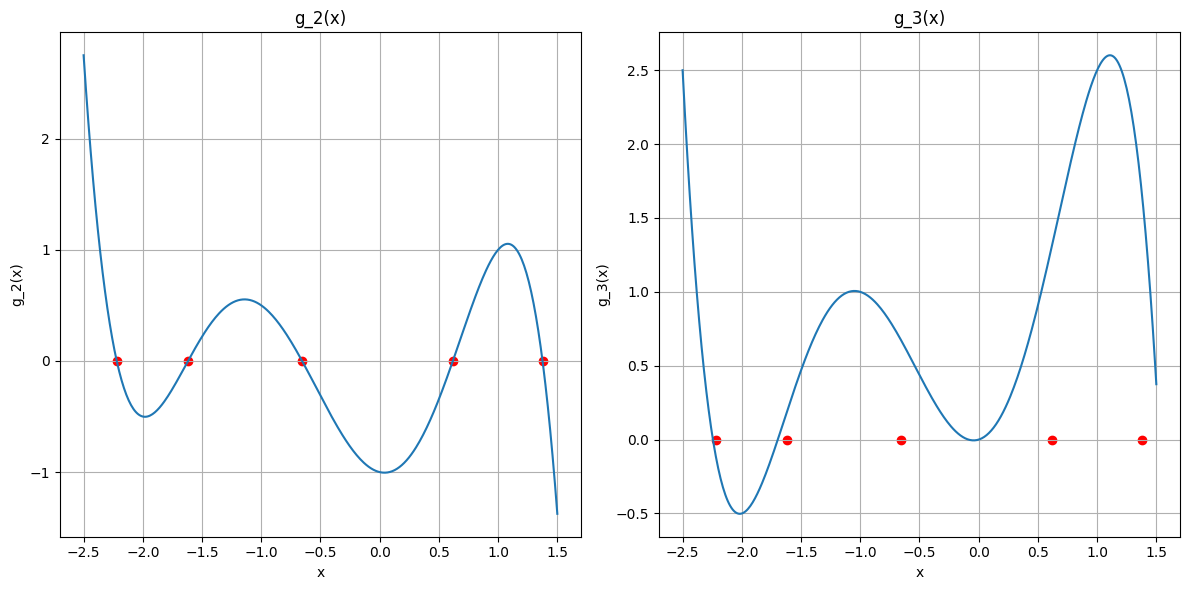

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fixed_point_iteration(g, x0, max_iter=20):
    x = x0
    history = [x]
    for _ in range(max_iter):
        try:
            x_new = g(x)
        except OverflowError:
            print(f"Overflow occurred at x = {x}")
            return history

        history.append(x_new)
        if abs(x_new - x) < 1e-6:
            break
        x = x_new
    return history

def g_2(x):
    return -(x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + x/2 + 2)/2

def g_3(x):
    return (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2 + x/2 + 2)/2

def iterate_g(func, x0):
    x = x0
    for _ in range(100):
        try:
            x_new = func(x)
            if abs(x_new - x) < 1e-6:
                return True, x_new
            x = x_new
        except OverflowError:
            print(f"Overflow occurred at x = {x} for function {func.__name__}")
            return False, float('inf')
    return False, x

x0 = 0.8
iterations_g2 = fixed_point_iteration(g_2, x0)
iterations_g3 = fixed_point_iteration(g_3, x0)

print("\nFixed Point Iterations:")
print(f"g_2(x): {iterations_g2}")
print(f"g_3(x): {iterations_g3}")

convergence_table_g2 = []
convergence_table_g3 = []

for root in roots:
    converged_g2, result_g2 = iterate_g(g_2, root.real)
    converged_g3, result_g3 = iterate_g(g_3, root.real)

    convergence_table_g2.append((root, converged_g2, result_g2))
    convergence_table_g3.append((root, converged_g3, result_g3))

print("\nConvergence Table for g_2(x):")
for root, converged, result in convergence_table_g2:
    print(f"Root: {root:.4f}, Converged: {converged}, Result: {result:.4f}")

print("\nConvergence Table for g_3(x):")
for root, converged, result in convergence_table_g3:
    print(f"Root: {root:.4f}, Converged: {converged}, Result: {result:.4f}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
x = np.linspace(-2.5, 1.5, 400)
y = g_2(x)
plt.plot(x, y)
plt.scatter(np.real(roots), np.zeros_like(roots), color='red')
plt.title('g_2(x)')
plt.xlabel('x')
plt.ylabel('g_2(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
y = g_3(x)
plt.plot(x, y)
plt.scatter(np.real(roots), np.zeros_like(roots), color='red')
plt.title('g_3(x)')
plt.xlabel('x')
plt.ylabel('g_3(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


#Question 02 [4 Marks]

Compute the Second Degree Richarson Extrapolation, `D^{2}` at `x = 1` and `h = 0.4` when the formula is derived using `h -> h/3`.

**N.B.** You can use the previously learned methods while solving the problem.

In [ ]:
def f(x):
    # Replace this with your actual function
    return x**2 * np.exp(-x)

def d2_finite_difference(x, h):
    return (9*f(x + h/3) - 16*f(x) + 7*f(x - h/3)) / (h**2)

def richardson_extrapolation(x, h):
    d2_h = d2_finite_difference(x, h)
    d2_h_third = d2_finite_difference(x, h/3)
    return (81*d2_h_third - d2_h) / 80

import numpy as np

x = 1
h = 0.4

result = richardson_extrapolation(x, h)
print(f"D^2 at x = {x} and h = {h}: {result}")


D^2 at x = 1 and h = 0.4: 1.5273729255943842
